# Source Nodes Plots
Here we find the number/ratio of source nodes in the Cell Collective models and plot them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
plt.rcParams.update({"font.size":20})

In [2]:
models_dir = "corrected_models" # cell_collective OR corrected_models

QC = pd.read_csv("data/model_categories.csv")
QC.columns = ["name", "category", "PMID"]

names = []
N = []
NS = []
for name in QC["name"]:
    names.append(name)
    with open(f"models/{models_dir}/{name}.txt", "r") as f:
        nt = 0
        ns = 0
        for row in f:
            if row[0] == "#":
                continue
            nt += 1
            if row.split(",")[0].strip() == row.split(",")[1].strip():
                ns += 1
        N.append(nt)
        NS.append(ns)

NDF = pd.DataFrame({
    "name": names,
    "N": N,
    "NS": NS,
})

QC=QC.merge(NDF)
QC["NS/N"] = (QC["NS"])/(QC["N"])
QC.set_index("name", inplace=True)

QC

,category,PMID,N,NS,NS/N
name,,,,,
Apoptosis Network,Signal Transduction (Stress/Damage and Homeost...,19422837,41,2,0.048780
Arabidopsis thaliana Cell Cycle,Cell Cycle,26340681,14,0,0.000000
Aurora Kinase A in Neuroblastoma,Cancer,26616283,23,4,0.173913
B bronchiseptica and T retortaeformis coinfection,Infection and Microbiome,2253585,53,1,0.018868
B cell differentiation,Development and Differentiation,26751566,22,5,0.227273
Bordetella bronchiseptica,Infection and Microbiome,2253585,33,0,0.000000
Bortezomib Responses in U266 Human Myeloma Cells,Cancer Drug Response,26163548,67,1,0.014925
BT474 Breast Cell Line Long-term ErbB Network,Cancer Drug Response,24970389,24,5,0.208333
BT474 Breast Cell Line Short-term ErbB Network,Cancer Drug Response,24970389,16,5,0.312500


In [3]:
highlight_marker_size = 350

color_list = ["#88CCEE", "#44AA99", "#117733", "#433685", "#DDCC77", "#999933","#CC6677", "#882255", "#AA4499", "#4141FF", "#FF66FF"] # tol_muted scheme

category_symbol_dict = {
    "Cancer": "X",
    "Cancer Drug Response": "P",
    "Cell Cycle": "o",
    "Development and Differentiation": "d",
    "Infection and Microbiome": "p",
    "Metabolism": "H",
    "Signal Transduction (Immune System Cells)": "^",
    "Signal Transduction (Other)": "v",
    "Signal Transduction (Drosophila)": ">",
    "Signal Transduction (Stress/Damage and Homeostasis)": "<",
}

highlight_color_dict = {
    "Apoptosis Network": color_list[0],
    "Arabidopsis thaliana Cell Cycle": color_list[1],
    "Aurora Kinase A in Neuroblastoma": color_list[2],
    "Cell Cycle Transcription by Coupled CDK and Network Oscillators": color_list[10],
    "Colitis-associated colon cancer": color_list[5],
    "Cortical Area Development": color_list[4],
    "Human Gonadal Sex Determination": color_list[3],
    "Metabolic Interactions in the Gut Microbiome": color_list[6],
    "Regulation of the L-arabinose operon of Escherichia coli": color_list[7],
    "Tumour Cell Invasion and Migration": color_list[8],
    "Signal Transduction in Fibroblasts": color_list[9]
}

highlight_list_source = [[] for _ in range(45)]
for model, color in highlight_color_dict.items():
    idx = int(QC["NS/N"][model]/0.0125)
    highlight_list_source[idx].append((category_symbol_dict[QC["category"][model]], color))

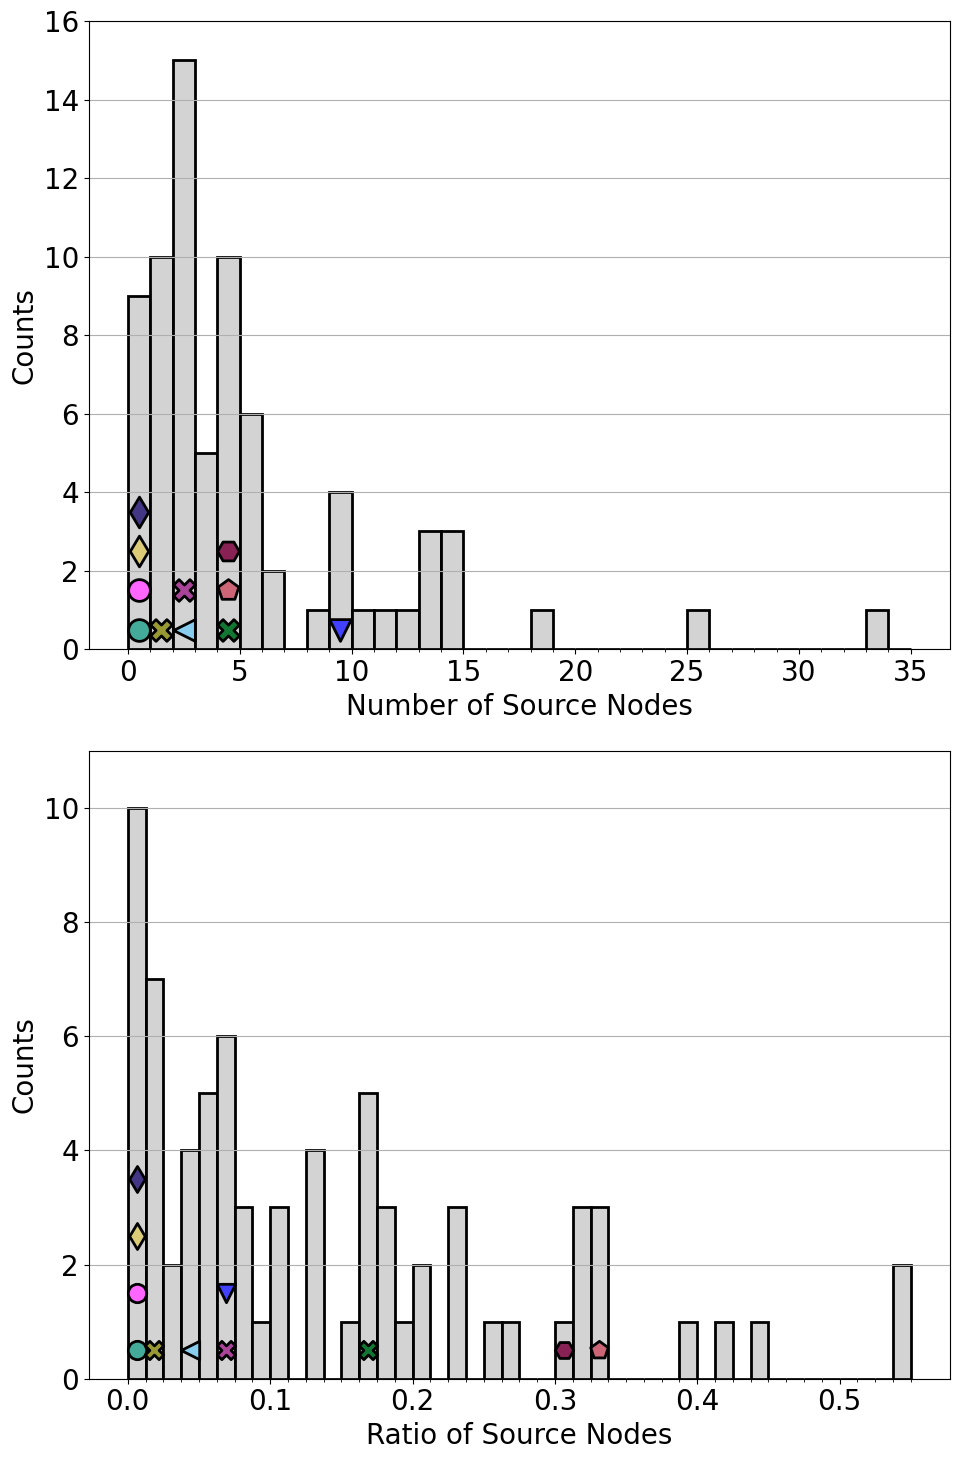

In [4]:

fig,ax = plt.subplots(2,1,figsize=(10,15))
ax[0].hist(QC["NS"], bins=35, range=(0,35), edgecolor="k", color="lightgrey", linewidth=2)
ax[0].set_xlabel("Number of Source Nodes")
ax[0].set_ylabel("Counts")
ax[0].set_yticks(range(0,17,2))
ax[0].set_xticks(range(0,35), minor=True)
ax[0].set_ylim((0, 16))
ax[0].grid(axis="y")

count = np.zeros(10) # Highlighted models have at most 10 source nodes
for model, color in highlight_color_dict.items():
    count[QC["NS"][model]] += 1
    ax[0].scatter(x=0.5+QC["NS"][model], y=count[QC["NS"][model]]-0.5, marker=category_symbol_dict[QC["category"][model]], c=color, s=0.7*highlight_marker_size, linewidths=2, edgecolor="k")


ax[1].hist(QC["NS/N"], bins=[i*0.0125 for i in range(45)], edgecolor="k", color="lightgrey", linewidth=2)
ax[1].set_xlabel("Ratio of Source Nodes")
ax[1].set_ylabel("Counts")
ax[1].set_yticks(range(0,11,2))
ax[1].set_xticks([i*0.0125 for i in range(45)], minor=True)
ax[1].set_ylim((0, 11))
ax[1].grid(axis="y")

for i in range(45):
    x = (i+0.5)*0.0125
    for idx, model in enumerate(highlight_list_source[i]):
        ax[1].scatter(x=x, y=idx+0.5, marker=model[0], c=model[1], s=0.5*highlight_marker_size, linewidths=2, edgecolor="k")

plt.tight_layout()
plt.savefig(f"./data/{models_dir}/figures/sources.png")
plt.savefig(f"./data/{models_dir}/figures/sources.pdf")
plt.show()

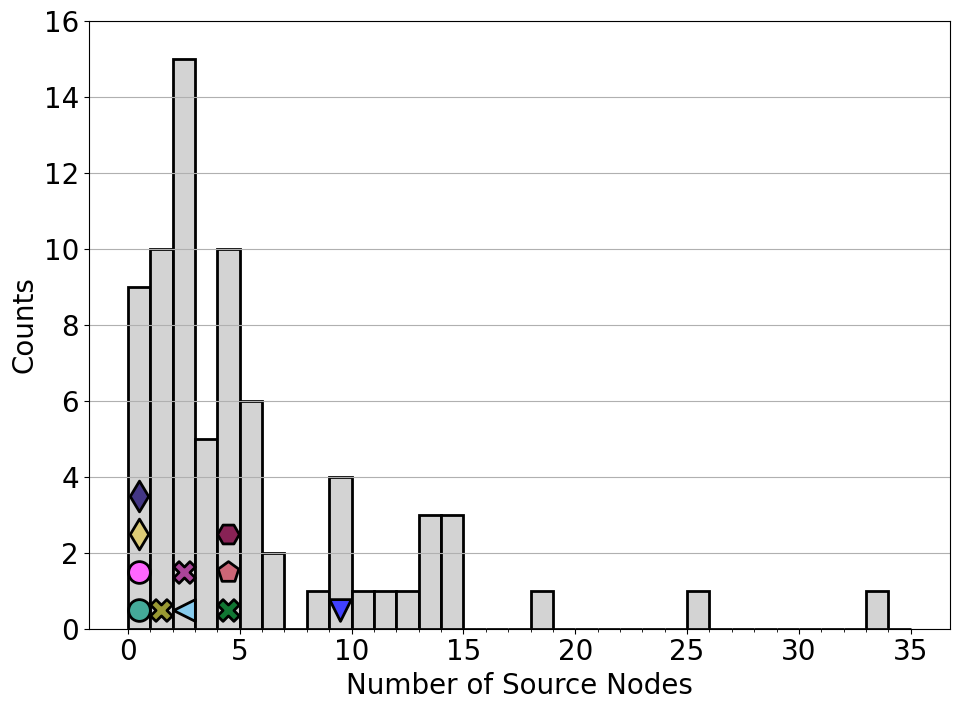

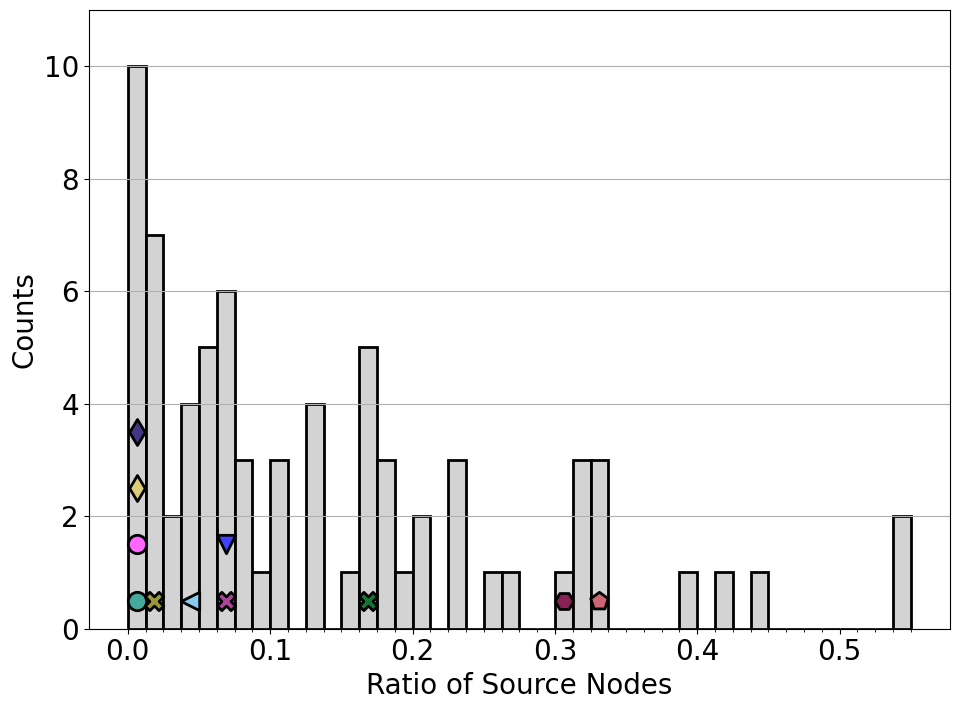

In [5]:
fig,ax = plt.subplots(1,1,figsize=(10,7.5), sharey=True)
ax.hist(QC["NS"], bins=35, range=(0,35), edgecolor="k", color="lightgrey", linewidth=2)
ax.set_xlabel("Number of Source Nodes")
ax.set_ylabel("Counts")
ax.set_yticks(range(0,17,2))
ax.set_xticks(range(0,35), minor=True)
ax.set_ylim((0, 16))
ax.grid(axis="y")

count = np.zeros(10) # Highlighted models have at most 10 source nodes
for model, color in highlight_color_dict.items():
    count[QC["NS"][model]] += 1
    ax.scatter(x=0.5+QC["NS"][model], y=count[QC["NS"][model]]-0.5, marker=category_symbol_dict[QC["category"][model]], c=color, s=0.7*highlight_marker_size, linewidths=2, edgecolor="k")

plt.tight_layout()
plt.savefig(f"./data/{models_dir}/figures/sources_number.png")
plt.savefig(f"./data/{models_dir}/figures/sources_number.pdf")
plt.show()

fig,ax = plt.subplots(1,1,figsize=(10,7.5))
ax.hist(QC["NS/N"], bins=[i*0.0125 for i in range(45)], edgecolor="k", color="lightgrey", linewidth=2)
ax.set_xlabel("Ratio of Source Nodes")
ax.set_ylabel("Counts")
ax.set_yticks(range(0,11,2))
ax.set_xticks([i*0.0125 for i in range(45)], minor=True)
ax.set_ylim((0, 11))
ax.grid(axis="y")

for i in range(45):
    x = (i+0.5)*0.0125
    for idx, model in enumerate(highlight_list_source[i]):
        ax.scatter(x=x, y=idx+0.5, marker=model[0], c=model[1], s=0.5*highlight_marker_size, linewidths=2, edgecolor="k")

plt.tight_layout()
plt.savefig(f"./data/{models_dir}/figures/sources_ratio.png")
plt.savefig(f"./data/{models_dir}/figures/sources_ratio.pdf")
plt.show()